In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from feature_engine import imputation
from feature_engine import encoding

# pipeline utility
from sklearn.pipeline import Pipeline

# preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures

# hyper-parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics to evaluate models
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

# feature selection
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

# support vector machines
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

# neighbors models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

# tree models
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

# ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [3]:
house_data = pd.read_csv('../data/train.csv', index_col='Id')
X = house_data.drop(labels='SalePrice', axis=1)
Y = house_data['SalePrice']
X.shape, Y.shape

((1460, 79), (1460,))

In [4]:
clean_pipeline = Pipeline(steps=[('most_miss_cat', imputation.CategoricalImputer(variables=['Alley',
                                                                                            'FireplaceQu',
                                                                                            'PoolQC',
                                                                                            'Fence',
                                                                                            'MiscFeature'])),
                                 ('least_miss_cat', imputation.RandomSampleImputer(random_state='LotArea',
                                                                                   seed='observation',
                                                                                   variables=['GarageCond',
                                                                                              'GarageType',
                                                                                              'GarageFinish',
                                                                                              'GarageQual',
                                                                                              'BsmtExposure',
                                                                                              'BsmtFinType2',
                                                                                              'BsmtCond',
                                                                                              'BsmtQual',
                                                                                              'BsmtFinType1',
                                                                                              'MasVnrType',
                                                                                              'Electrical'])),
                                 ('least_miss_num', imputation.RandomSampleImputer(random_state='LotArea',
                                                                                   seed='observation',
                                                                                   variables=['LotFrontage',
                                                                                              'GarageYrBlt',
                                                                                              'MasVnrArea'])),
                                 ('encode', encoding.OrdinalEncoder(
                                     variables=X.select_dtypes(include=object).columns.to_list())),
                                 ('scaling', RobustScaler()),
                                 ('transform', QuantileTransformer(output_distribution='normal')),
                                 ('scale_to_range', MinMaxScaler())],
                          )

clean_pipeline.get_params()

{'memory': None,
 'steps': [('most_miss_cat',
   CategoricalImputer(variables=['Alley', 'FireplaceQu', 'PoolQC', 'Fence',
                                 'MiscFeature'])),
  ('least_miss_cat',
   RandomSampleImputer(random_state='LotArea', seed='observation',
                       variables=['GarageCond', 'GarageType', 'GarageFinish',
                                  'GarageQual', 'BsmtExposure', 'BsmtFinType2',
                                  'BsmtCond', 'BsmtQual', 'BsmtFinType1',
                                  'MasVnrType', 'Electrical'])),
  ('least_miss_num',
   RandomSampleImputer(random_state='LotArea', seed='observation',
                       variables=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'])),
  ('encode',
   OrdinalEncoder(variables=['MSZoning', 'Street', 'Alley', 'LotShape',
                             'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                             'Neighborhood', 'Condition1', 'Condition2',
                             'Bl

In [5]:
X_ = clean_pipeline.fit_transform(X, Y)
X_

array([[0.53092803, 0.51489897, 0.48546724, ..., 0.51075999, 0.49396369,
        0.50096519],
       [0.        , 0.51489897, 0.55885325, ..., 0.4571177 , 0.49396369,
        0.50096519],
       [0.53092803, 0.51489897, 0.49746612, ..., 0.51075999, 0.49396369,
        0.50096519],
       ...,
       [0.56463603, 0.51489897, 0.49154383, ..., 1.        , 0.49396369,
        0.50096519],
       [0.        , 0.51489897, 0.49746612, ..., 1.        , 0.49396369,
        0.50096519],
       [0.        , 0.51489897, 0.53143667, ..., 0.51075999, 0.49396369,
        0.50096519]])

In [6]:
X_.shape

(1460, 79)

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X_, Y, test_size=0.2, random_state=48)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1168, 79), (292, 79), (1168,), (292,))

In [8]:
cv = RepeatedKFold(n_splits=12, n_repeats=24, random_state=64)

In [9]:
ols_model = LinearRegression()
ols_model.fit(train_x, train_y)

LinearRegression()

In [34]:
def baseline_report(true_train_y, true_test_y, trained_x, tested_x, model):
    print('train=>')
    print('r2 score: ', format(r2_score(true_train_y, model.predict(trained_x))))
    print('max error: ', format(max_error(true_train_y, model.predict(trained_x))))
    print('mean squared error: ', format(mean_squared_error(true_train_y, model.predict(trained_x))))

    print('\ntest=>')
    print('r2 score: ', format(r2_score(true_test_y, model.predict(tested_x))))
    print('max error: ', format(max_error(true_test_y, model.predict(tested_x))))
    print('mean squared error: ', format(mean_squared_error(true_test_y, model.predict(tested_x))))

    plt.figure(figsize=[12, 6], dpi=300)
    sns.regplot(x=true_train_y, y=model.predict(trained_x),
                label='train',
                scatter_kws=dict(alpha=0.6))
    sns.regplot(x=true_test_y, y=model.predict(tested_x),
                label='test',
                scatter_kws=dict(alpha=0.6))
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.legend()
    plt.show()

train=>
r2 score:  0.8782943837241023
max error:  279976.41275742196
mean squared error:  771577495.1026858

test=>
r2 score:  0.7458211682399826
max error:  416390.30513530714
mean squared error:  1568625008.3796895


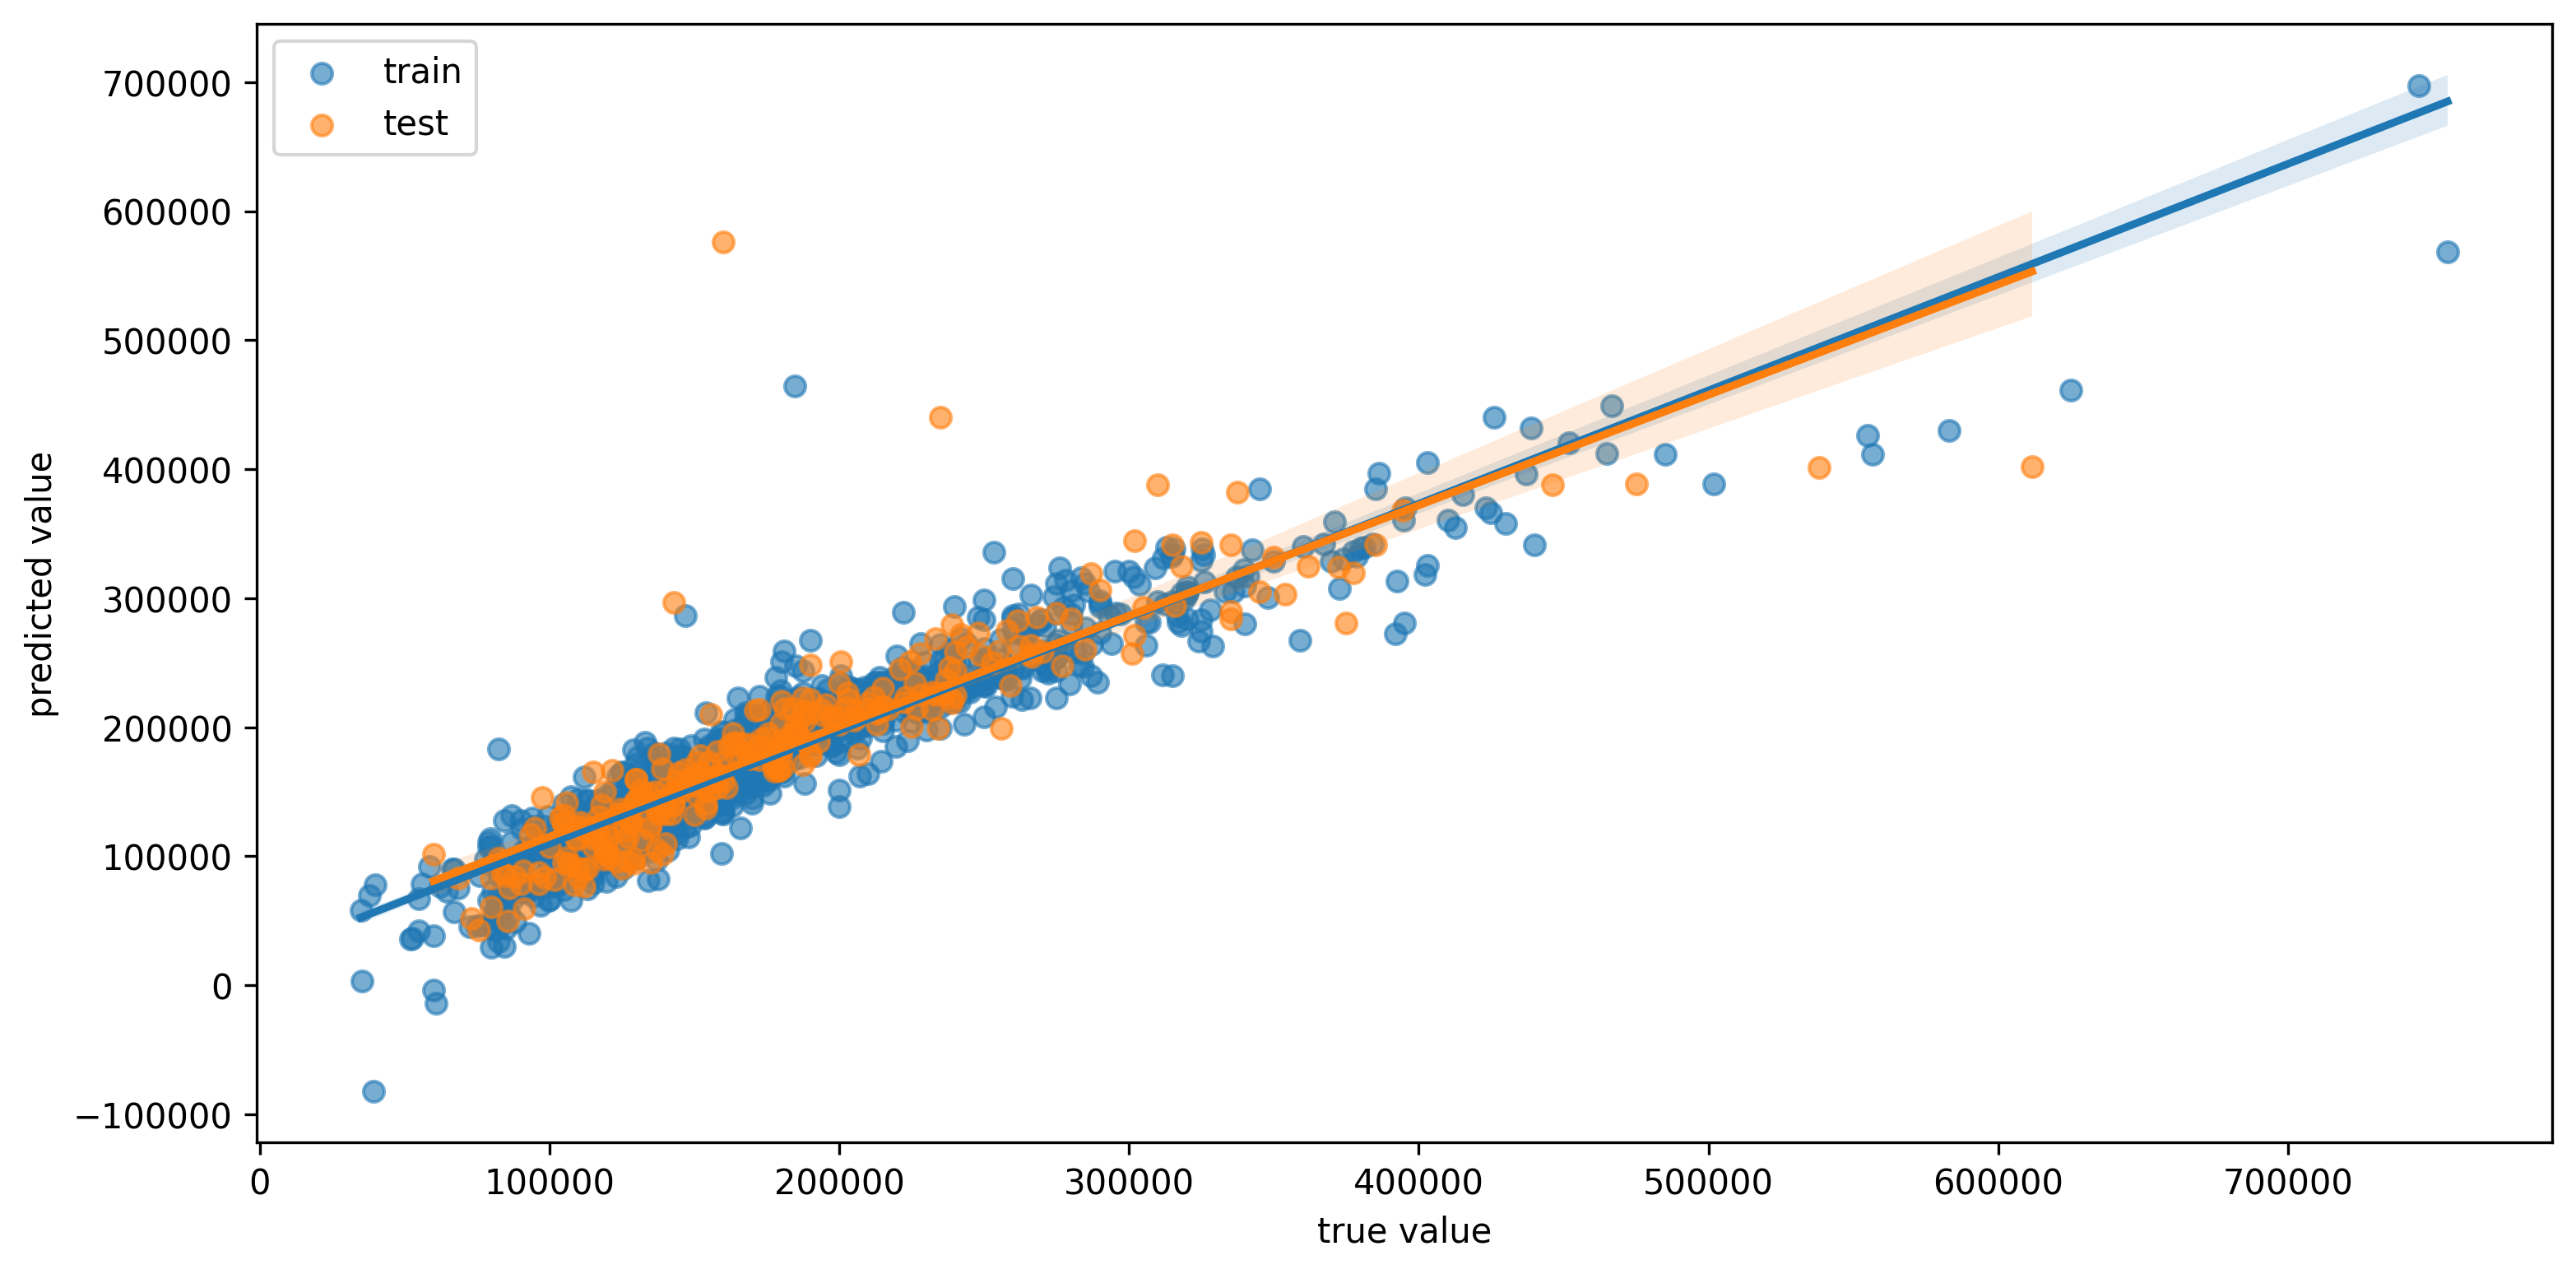

In [35]:
baseline_report(train_y, test_y, train_x, test_x, ols_model)

In [20]:
lasso_model = Lasso(alpha=0.5, max_iter=5000)
lasso_model.fit(train_x, train_y)

Lasso(alpha=0.5, max_iter=5000)

train=>
r2 score:  0.8782915798672829
max error:  280191.48825216317
mean squared error:  771595270.7229702

test=>
r2 score:  0.7466216231519127
max error:  416387.0347242502
mean squared error:  1563685125.761457


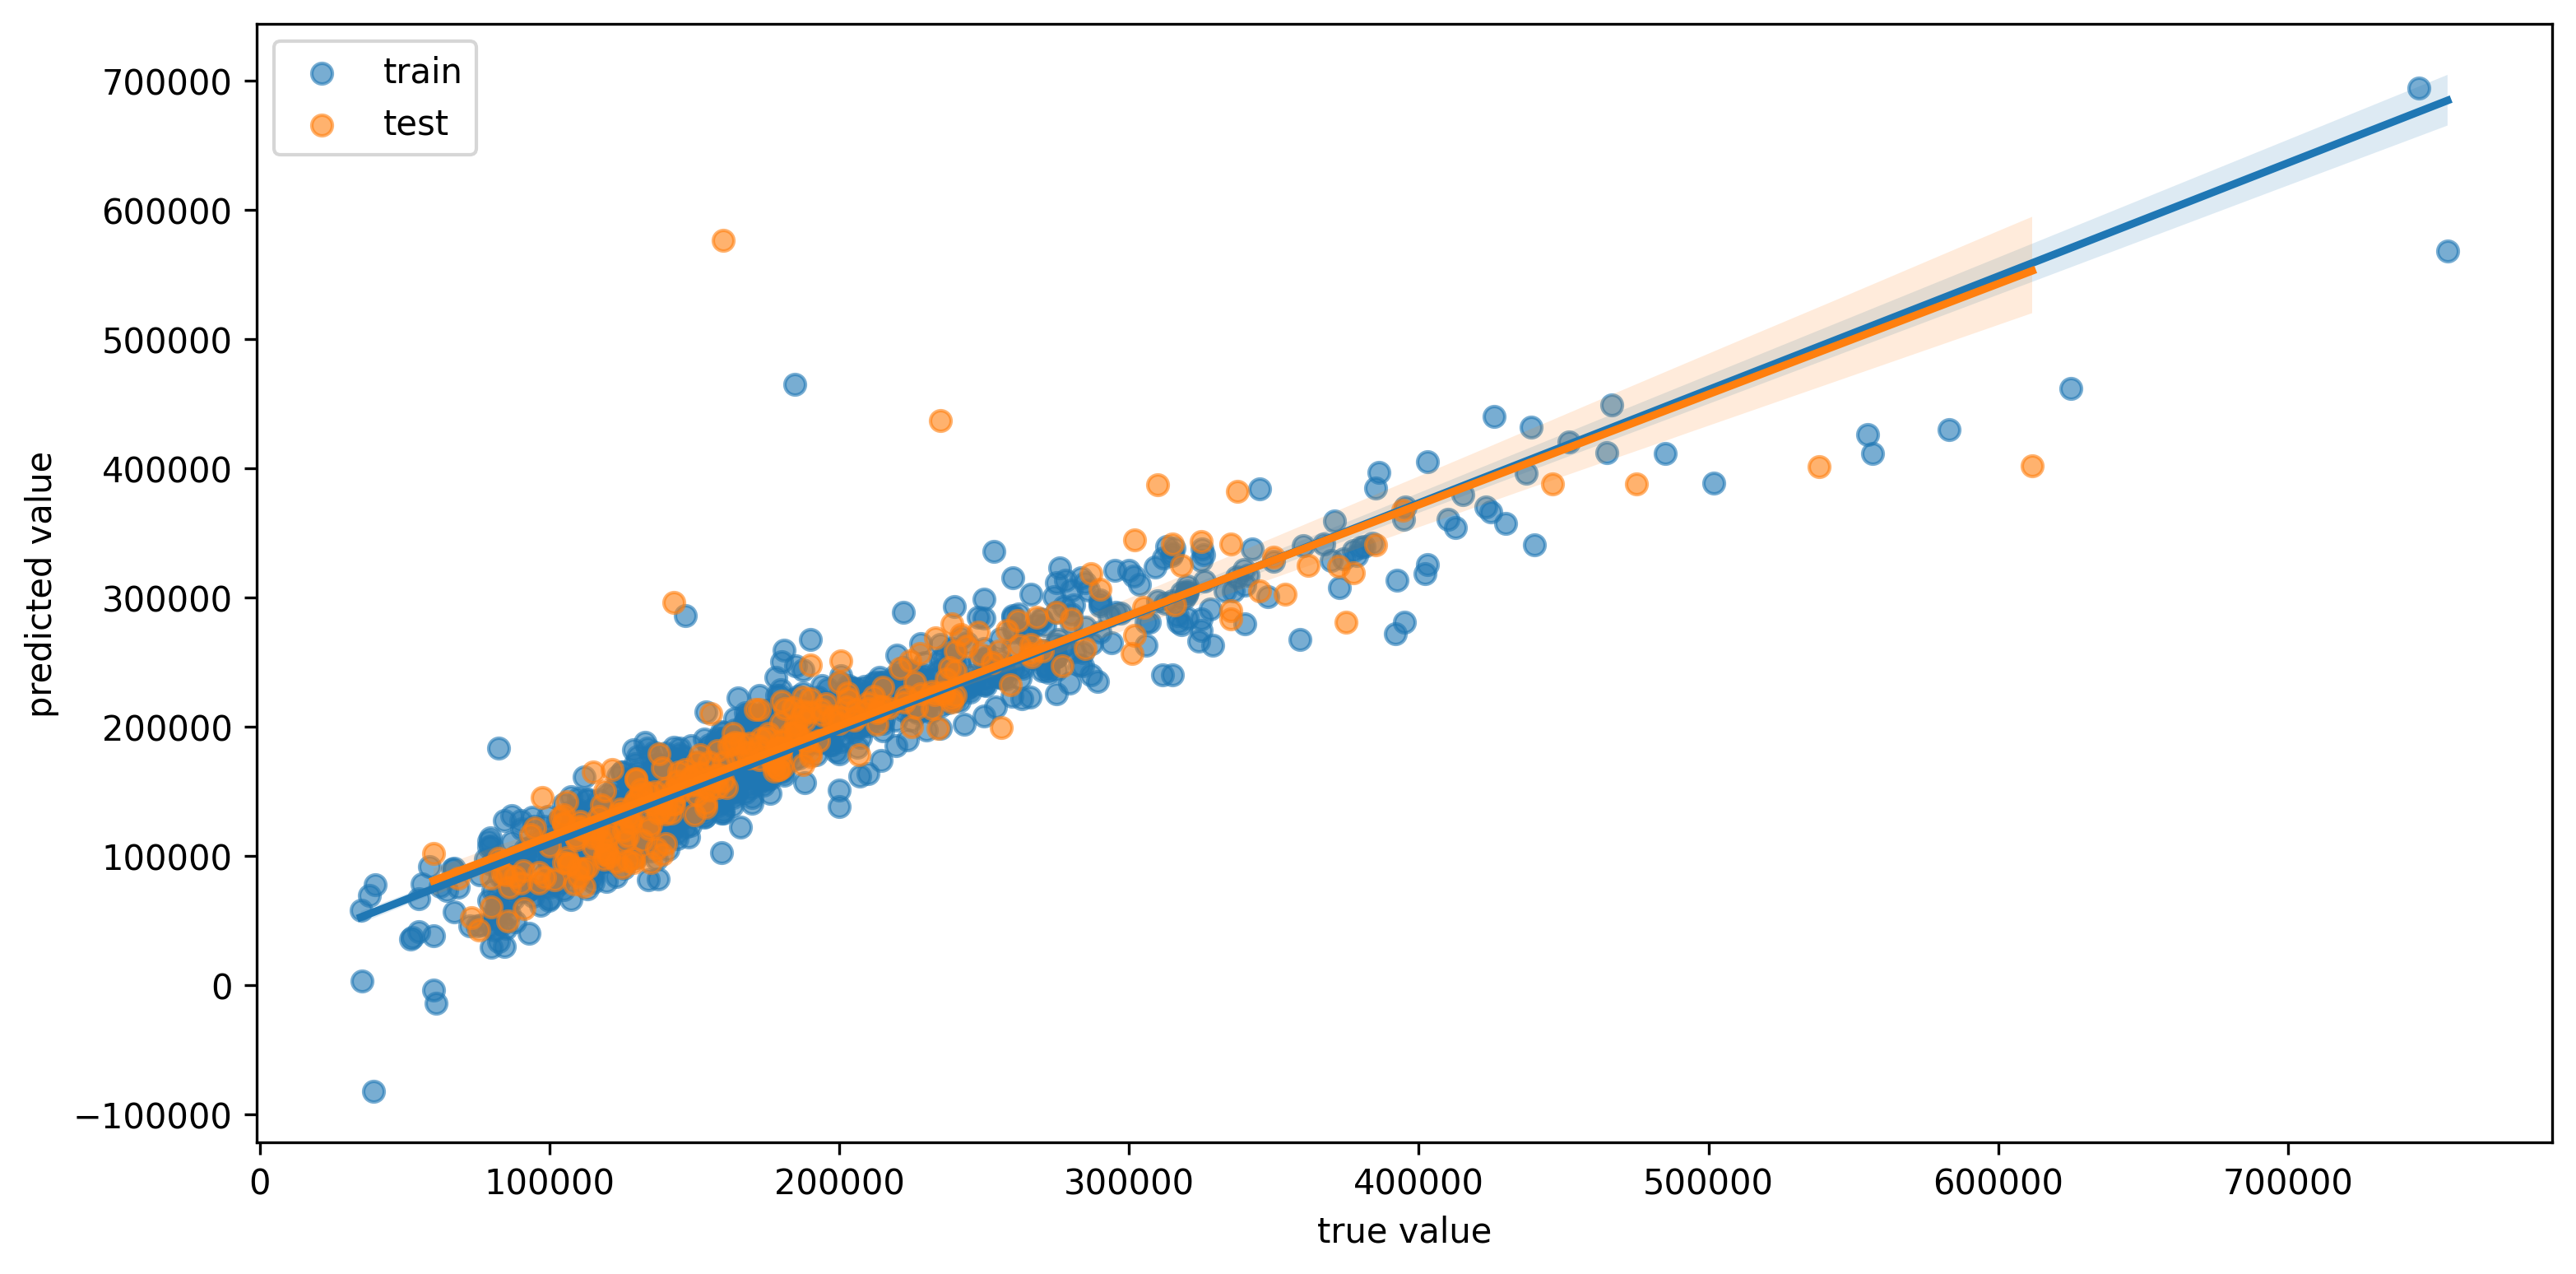

In [36]:
baseline_report(train_y, test_y, train_x, test_x, lasso_model)

In [26]:
ridge_model = Ridge(alpha=0.5, max_iter=5000)
ridge_model.fit(train_x, train_y)

Ridge(alpha=0.5, max_iter=5000)

train=>
r2 score:  0.8750521031596584
max error:  287752.1392473398
mean squared error:  792132591.8425328

test=>
r2 score:  0.7704929268966869
max error:  404930.1583575959
mean squared error:  1416367098.6173463


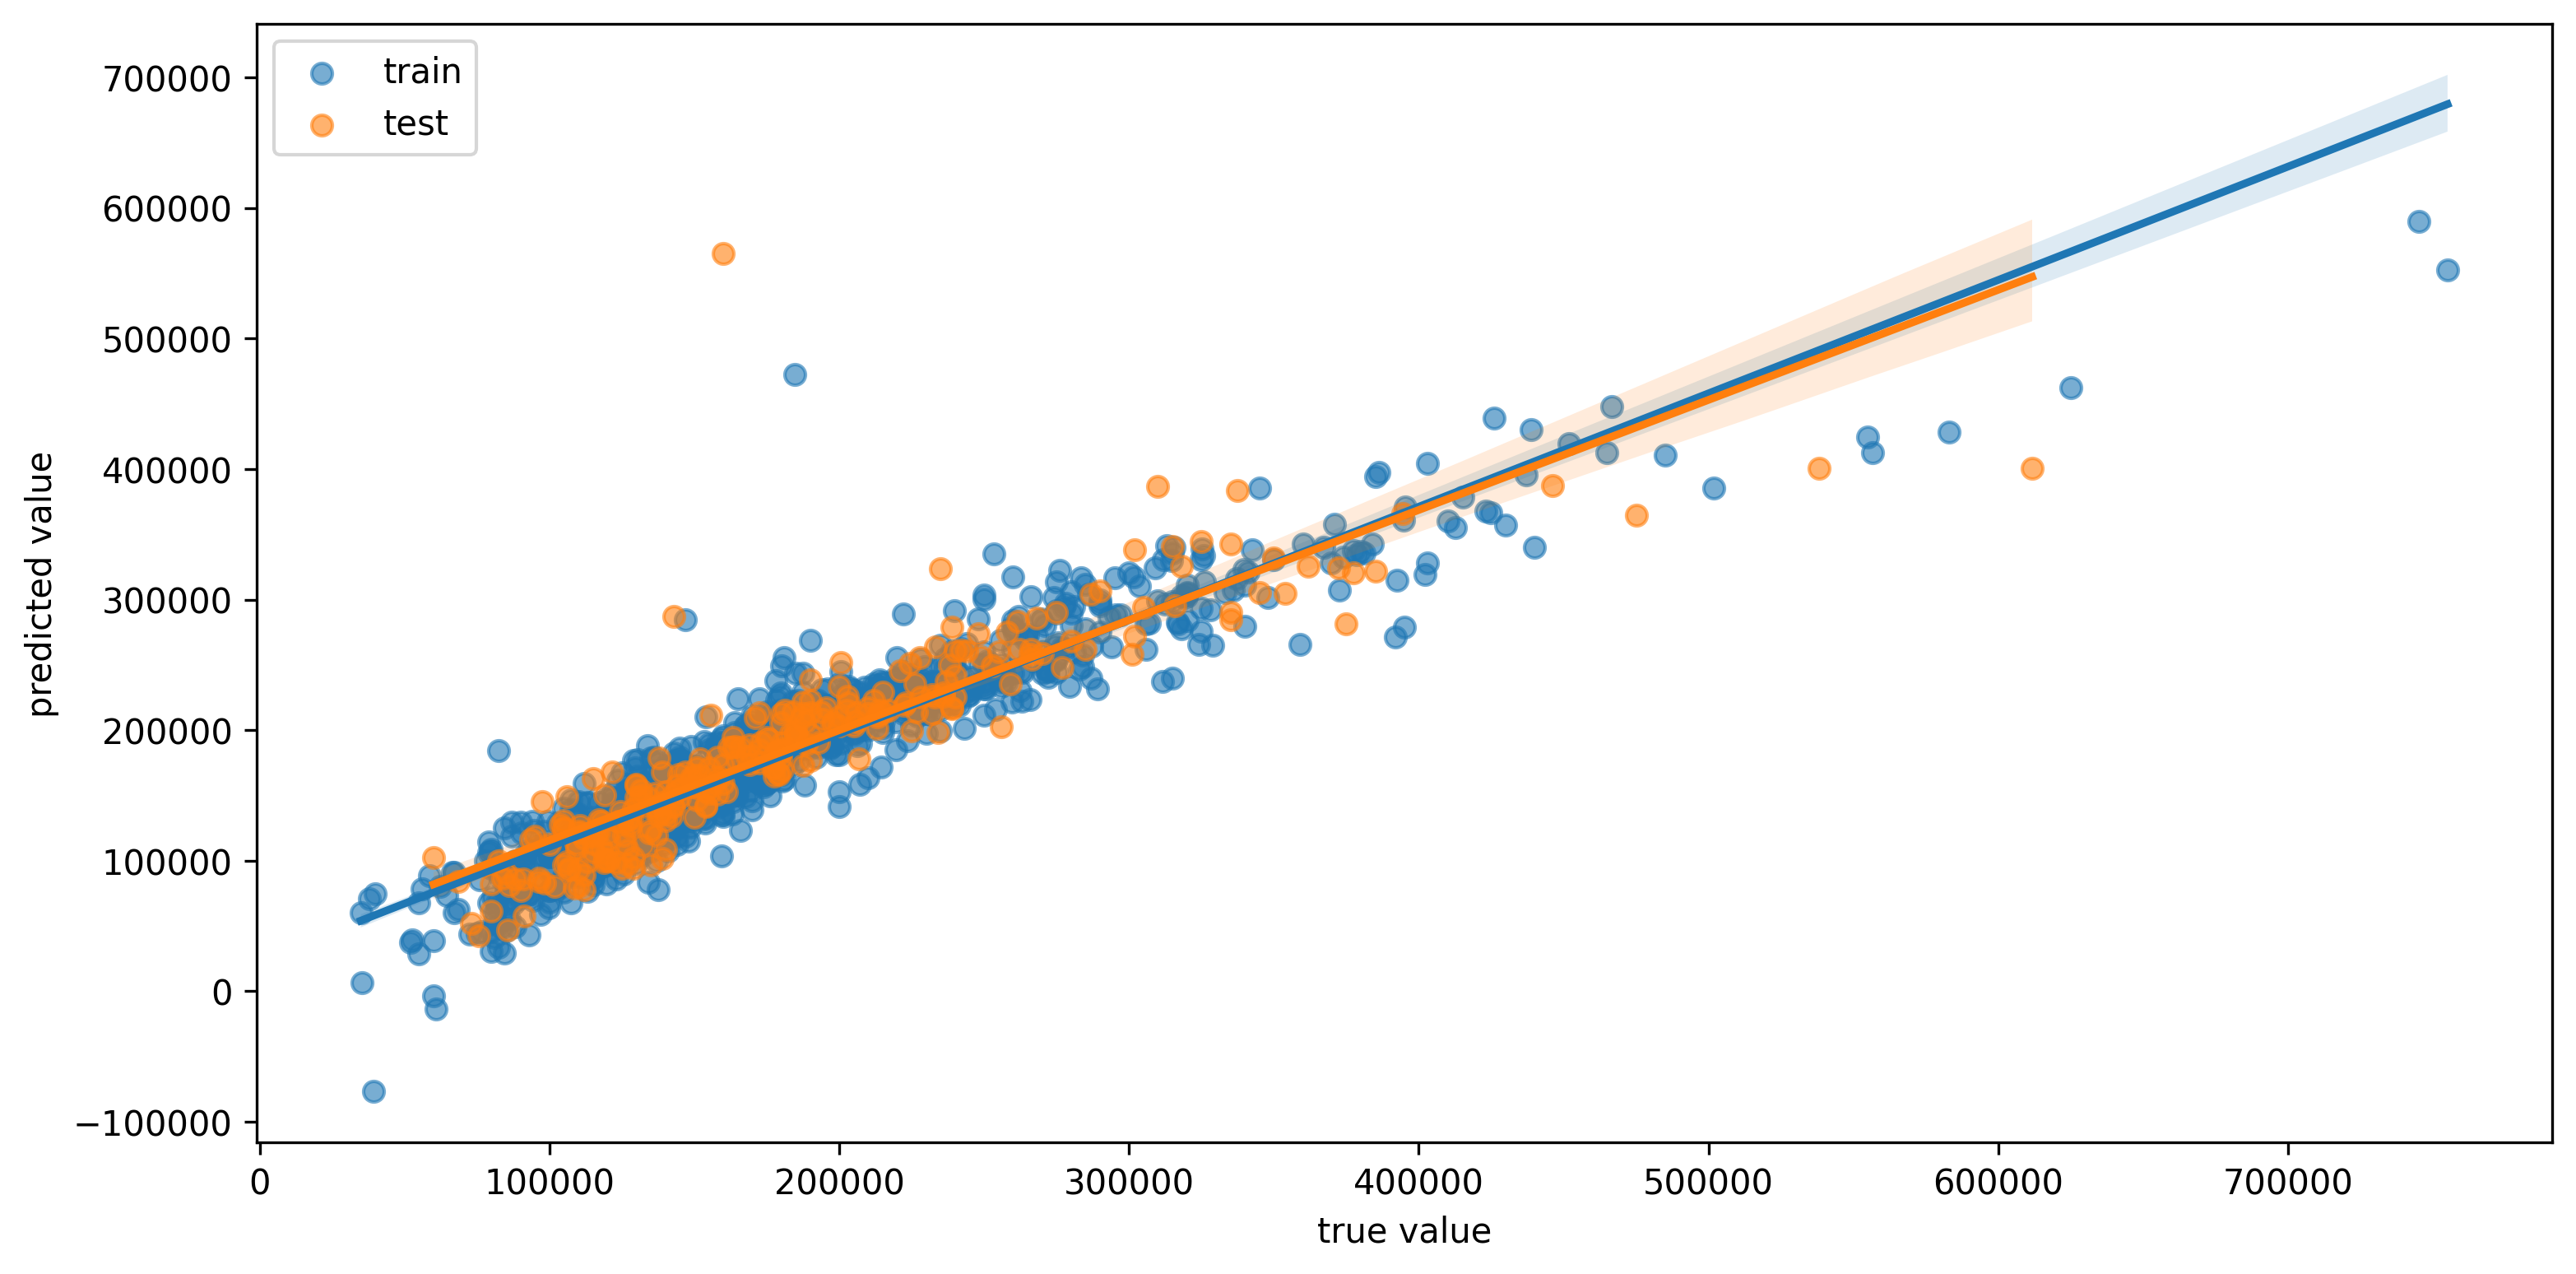

In [37]:
baseline_report(train_y, test_y, train_x, test_x, ridge_model)